# Jobsheet 4 : Klasifikasi
**Name : Syahrul Bhudi Ferdiansyah<br>**
**Kelas: TI - 2F**

## Praktikum 1

In [29]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

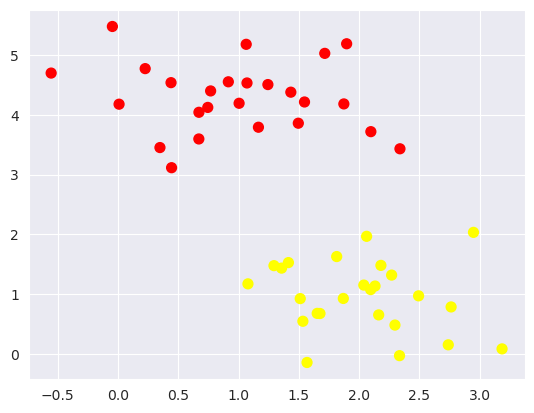

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Kode berikut membuat dan memvisualisasikan data sintetik dengan dua cluster. Mengimpor `make_blobs` dari `sklearn.datasets`, kode tersebut menghasilkan 50 titik data dengan dua cluster dan deviasi standar 0.60, menggunakan `random_state=0` untuk konsistensi hasil. Titik data disimpan dalam array `X` (koordinat) dan label cluster dalam array `y`. Plot scatter dihasilkan dengan `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`, di mana `c=y` memberi warna titik berdasarkan label cluster, `s=50` menentukan ukuran titik, dan `cmap='autumn'` menentukan colormap untuk warna.

(-1.0, 3.5)

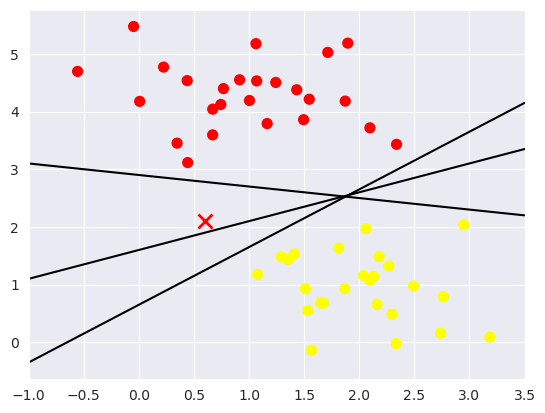

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Kode tersebut menghasilkan plot yang menampilkan titik data `X` dengan warna berdasarkan label `y`, ukuran titik 50, dan colormap 'autumn'. Garis ditambahkan ke plot dengan menggunakan `plt.plot(xfit, m * xfit + b, '-k')`, di mana beberapa garis dengan kemiringan (`m`) dan intercept (`b`) yang berbeda digambar pada array `xfit` untuk menunjukkan garis pemisah. Titik merah berbentuk 'x' ditambahkan pada posisi (0.6, 2.1) untuk menandai lokasi tertentu. Plot dibatasi dengan sumbu x dari -1 hingga 3.5 menggunakan `plt.xlim(-1, 3.5)`.

(-1.0, 3.5)

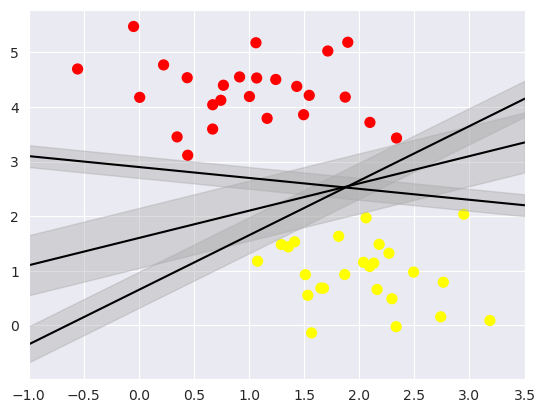

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Kode ini membuat plot yang menampilkan titik data `X` dengan warna berdasarkan label `y` dan beberapa garis dengan area deviasi di sekitarnya. Titik data dipetakan menggunakan `plt.scatter`, dan beberapa garis dengan kemiringan (`m`), intercept (`b`), dan deviasi (`d`) digambar untuk menunjukkan berbagai kemungkinan pemisahan. Area di sekitar setiap garis diisi dengan warna abu-abu transparan menggunakan `plt.fill_between`, menunjukkan margin deviasi di sekitar garis tersebut. Plot dibatasi dengan sumbu x dari -1 hingga 3.5 menggunakan `plt.xlim`.

In [5]:
from sklearn.svm import SVC  # "Support vector classifier"

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

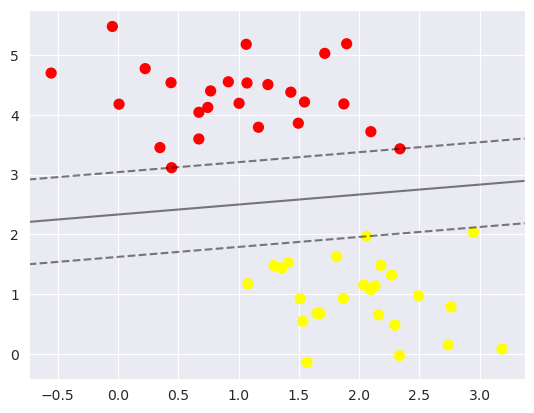

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Fungsi `plot_svc_decision_function` digunakan untuk menampilkan batas keputusan dan margin dari model Support Vector Classifier (SVC) pada plot. Fungsi ini menerima model SVC dan sebuah axis (`ax`) sebagai input, dan mengatur grid untuk evaluasi model berdasarkan rentang sumbu x dan y dari axis yang diberikan. Ia menggambar kontur batas keputusan dan margin menggunakan `ax.contour` dengan tingkat kontur -1, 0, dan 1, serta mengisi area di sekitar garis dengan alpha 0.5. Jika `plot_support` diaktifkan, fungsi juga memplot vektor dukungan (support vectors) dengan ukuran besar dan garis tepi yang jelas. Setelah itu, sumbu x dan y dikembalikan ke rentang semula. Kemudian, data titik ditampilkan dengan `plt.scatter`, dan fungsi `plot_svc_decision_function` digunakan untuk menampilkan batas keputusan model pada plot tersebut.

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

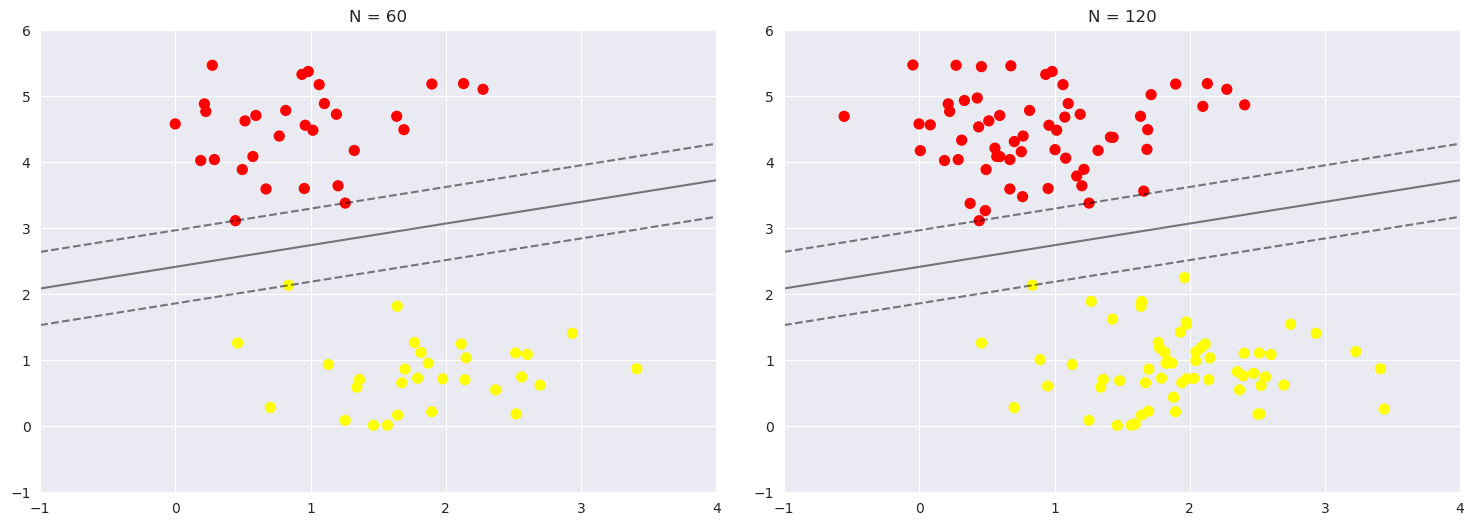

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Fungsi `plot_svm` digunakan untuk menampilkan hasil pemodelan Support Vector Machine (SVM) dengan data yang dihasilkan oleh `make_blobs`. Fungsi ini mengambil parameter `N` untuk menentukan jumlah sampel yang akan digunakan dan `ax` untuk menentukan axis plot. Di dalam fungsi, data dengan `N` sampel dipilih dari 200 titik yang dihasilkan, model SVM dengan kernel linier dan parameter `C` yang besar dilatih pada data tersebut. Titik data kemudian diplot dengan warna yang berbeda untuk setiap kelas, dan batas keputusan SVM digambar menggunakan fungsi `plot_svc_decision_function`. Plot disesuaikan dengan rentang sumbu x dan y. Kode kemudian membuat dua subplot, dan `plot_svm` dipanggil untuk masing-masing subplot dengan jumlah sampel 60 dan 120, menampilkan perbandingan hasil untuk jumlah sampel yang berbeda.

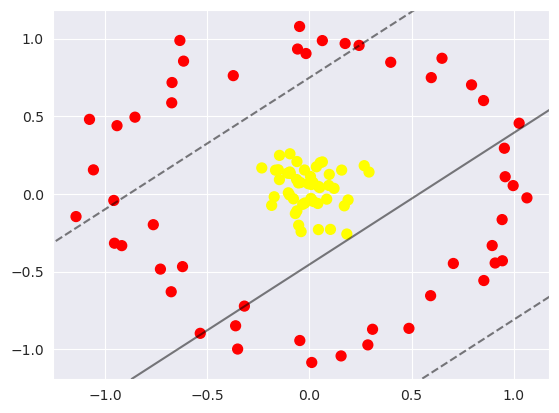

In [10]:
# contoh data tidak terpisah secara linier

## Data tidak terpisah secara linier

from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Kode ini membuat dan memvisualisasikan dataset yang tidak dapat dipisahkan secara linier dengan menggunakan `make_circles` untuk menghasilkan data berbentuk lingkaran dengan faktor dan noise yang ditentukan. Model Support Vector Classifier (SVC) dengan kernel linier dilatih pada data tersebut. Setelah pelatihan, titik data diplot dengan warna yang sesuai untuk setiap kelas, dan batas keputusan model digambar menggunakan fungsi `plot_svc_decision_function`, namun tanpa menampilkan vektor dukungan. Hasilnya menunjukkan bahwa model linier tidak mampu memisahkan data dengan pola lingkaran yang saling bersilangan.

In [11]:
r = np.exp(-(X ** 2).sum(1))

In [23]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')


interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.04676616, -0.94424494],
       [-0.04362294,  0.07287375],
       [-0.37232751,  0.76098824],
       [-0.91799145, -0.3334717 ],
       [-0.63359542,  0.98747221],
       [-0.85329375,  0.49358159],
       [ 0.06348609,  0.20556623],
       [ 0.70440511, -0.44829912],
       [ 0.28608933, -0.97241412],
       [-0.15198007,  0.15480121],
       [-0.0624798 ,  0.09208558],
       [ 0.01163488, -1.08565947],
       [-0.04054275, -0.24314827],
       [ 0.05278959,  0.20049129],
       [ 0.0973839 ,  0.12507691],
       [-0.31791721, -0.72275671],
       [ 0.29168233,  0.14028413],
       [-0.95354221, -0.31789121],
       [-0.94118576,  0.43886217],
       [ 1.02633206,  0.4545785 ],
       [ 0.954051  ,  0.29358388],
       [-0.17211301, -0.01887279],
       [ 0.03414018,  0.17405287],
       [ 0.94308654, -0.16575412],
       [-0.1465584 ,  0.09163471],
       [-0.07790541, -0.0321448 ],
       [-0.03263829, -0.06745628],
       [

Kode ini digunakan untuk membuat visualisasi 3D interaktif dari dataset dengan `matplotlib` dan `ipywidgets`. Fungsi `plot_3D` menghasilkan plot 3D dengan sumbu x dan y dari `X` dan sumbu z dari variabel `r`, mewarnai titik berdasarkan label `y`. Dengan `interact`, Anda dapat mengubah sudut pandang plot menggunakan slider untuk elevasi (`elev`) dan azimuth (`azim`). `plt.subplot(projection='3d')` membuat subplot 3D, dan `ax.scatter3D` menggambar titik-titik data dalam 3D dengan ukuran 50 dan colormap 'autumn'.

In [24]:
interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.04676616, -0.94424494],
       [-0.04362294,  0.07287375],
       [-0.37232751,  0.76098824],
       [-0.91799145, -0.3334717 ],
       [-0.63359542,  0.98747221],
       [-0.85329375,  0.49358159],
       [ 0.06348609,  0.20556623],
       [ 0.70440511, -0.44829912],
       [ 0.28608933, -0.97241412],
       [-0.15198007,  0.15480121],
       [-0.0624798 ,  0.09208558],
       [ 0.01163488, -1.08565947],
       [-0.04054275, -0.24314827],
       [ 0.05278959,  0.20049129],
       [ 0.0973839 ,  0.12507691],
       [-0.31791721, -0.72275671],
       [ 0.29168233,  0.14028413],
       [-0.95354221, -0.31789121],
       [-0.94118576,  0.43886217],
       [ 1.02633206,  0.4545785 ],
       [ 0.954051  ,  0.29358388],
       [-0.17211301, -0.01887279],
       [ 0.03414018,  0.17405287],
       [ 0.94308654, -0.16575412],
       [-0.1465584 ,  0.09163471],
       [-0.07790541, -0.0321448 ],
       [-0.03263829, -0.06745628],
       [

In [25]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

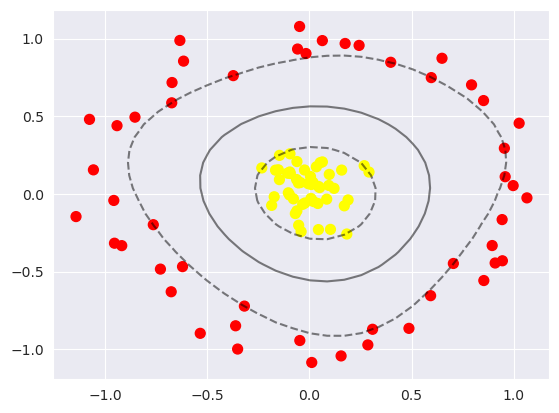

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Kode ini memvisualisasikan data titik 2D dengan `plt.scatter`, mewarnai titik berdasarkan label `y` dan menggunakan ukuran titik 50 dengan colormap 'autumn'. Fungsi `plot_svc_decision_function(clf)` digunakan untuk menggambar batas keputusan dari model Support Vector Classifier (SVC) yang telah dilatih. Selain itu, vektor dukungan (support vectors) dari model juga diplot dengan ukuran besar (300) dan garis tepi (linewidth) 1, dengan warna latar belakang yang tidak ada, untuk menekankan titik-titik tersebut dalam plot.

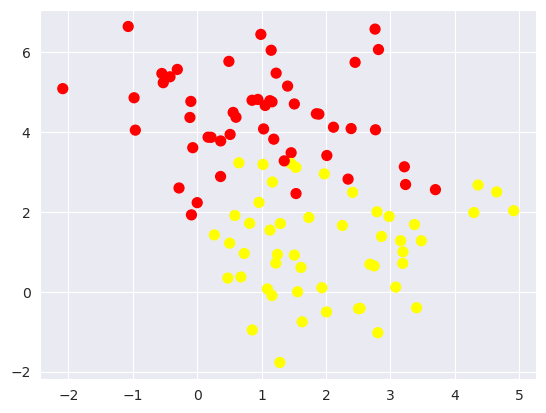

In [27]:
## Data Overlap

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

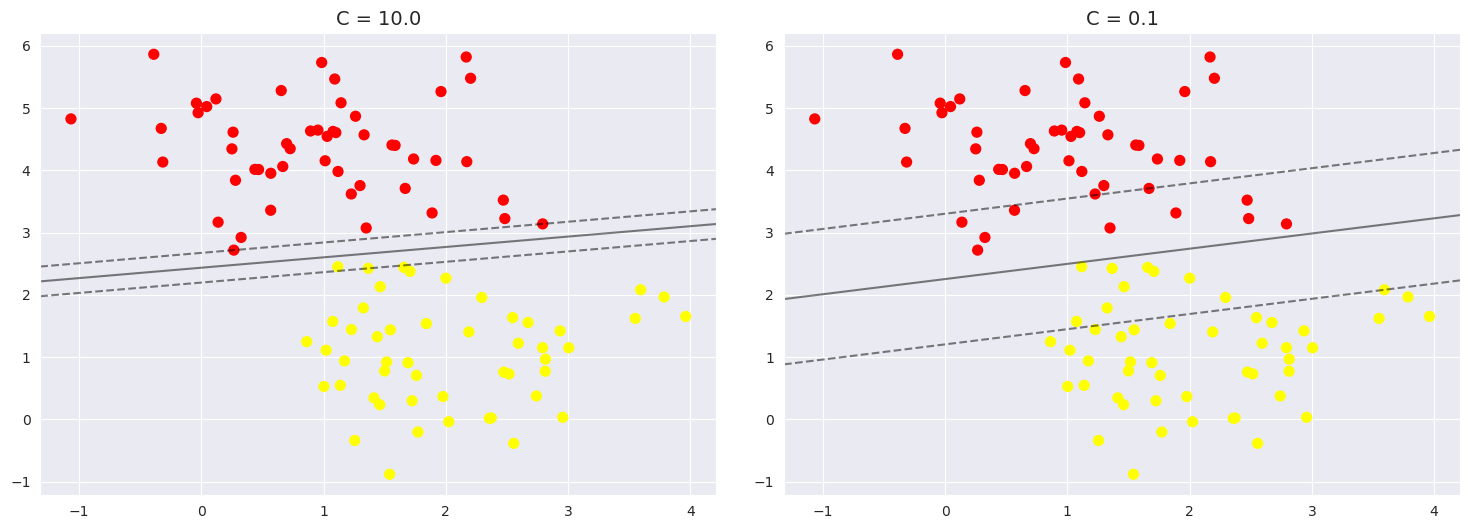

In [28]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Kode ini memvisualisasikan pengaruh parameter `C` pada model Support Vector Classifier (SVC) dengan kernel linier pada data yang dihasilkan oleh `make_blobs`. Pertama, data dengan 100 sampel dan dua cluster dibuat dengan deviasi standar 0.8. Kemudian, dua subplot disiapkan dalam satu figure dengan ukuran 16x6. Untuk setiap subplot, model SVC dilatih dengan parameter `C` yang berbeda (10.0 dan 0.1). Data ditampilkan pada subplot dengan warna yang sesuai untuk setiap kelas, batas keputusan model digambar menggunakan `plot_svc_decision_function`, dan vektor dukungan diplot dengan ukuran besar dan garis tepi. Judul subplot menunjukkan nilai `C` yang digunakan, menyoroti perbedaan hasil model dengan parameter yang berbeda.